
Пункт1 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv('./Admission_Predict.csv', sep=',')

In [4]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## 2. Описание постановки задач

Необходимо классифицировать вероятность принятия студентов в университет по критериям : GRE Score, TOEFL Score, University Rating,	SOP,	LOR,	CGPA	Research,	Chance of Admit. Целевое значение - Chance of Admit, является дискретным, так как лежит в диапазоне от 0 до 1

## 3 Построить распределение целевой переменной в виде гистограммы
 сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.

In [5]:
data.columns = data.columns.str.replace(' ', '')
data["ChanceofAdmit"].unique().tolist()


[0.92,
 0.76,
 0.72,
 0.8,
 0.65,
 0.9,
 0.75,
 0.68,
 0.5,
 0.45,
 0.52,
 0.84,
 0.78,
 0.62,
 0.61,
 0.54,
 0.66,
 0.63,
 0.64,
 0.7,
 0.94,
 0.95,
 0.97,
 0.44,
 0.46,
 0.74,
 0.91,
 0.88,
 0.58,
 0.48,
 0.49,
 0.53,
 0.87,
 0.86,
 0.89,
 0.82,
 0.56,
 0.36,
 0.42,
 0.47,
 0.55,
 0.57,
 0.96,
 0.93,
 0.38,
 0.34,
 0.79,
 0.71,
 0.69,
 0.59,
 0.85,
 0.77,
 0.81,
 0.83,
 0.67,
 0.73,
 0.6,
 0.43,
 0.51,
 0.39]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


Text(0, 0.5, 'Частота')

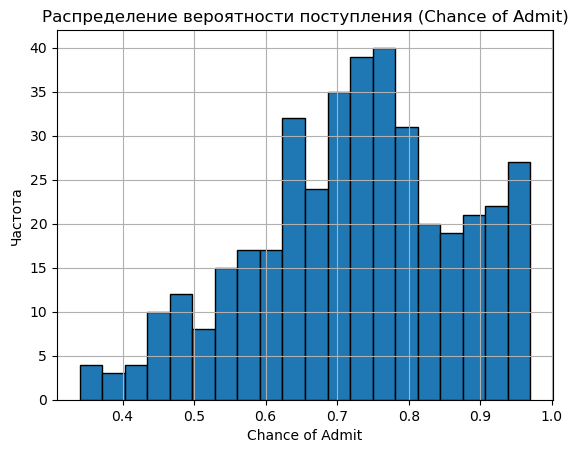

In [7]:
data["ChanceofAdmit"].hist(bins=20, edgecolor='black')
plt.title('Распределение вероятности поступления (Chance of Admit)')
plt.xlabel('Chance of Admit')
plt.ylabel('Частота')

## 4
Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается одним методом (вы его знаете).

In [8]:
data.describe()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## 5
Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается одним методом (вы его знаете).

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo.         400 non-null    int64  
 1   GREScore          400 non-null    int64  
 2   TOEFLScore        400 non-null    int64  
 3   UniversityRating  400 non-null    int64  
 4   SOP               400 non-null    float64
 5   LOR               400 non-null    float64
 6   CGPA              400 non-null    float64
 7   Research          400 non-null    int64  
 8   ChanceofAdmit     400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


## 6
Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.

In [10]:
data.isna().sum()

SerialNo.           0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

## 7
Постройте гистограммы 5 любых признаков (из множества X, или как оно изначально у нас называется data.data). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.

Text(0, 0.5, 'Частота')

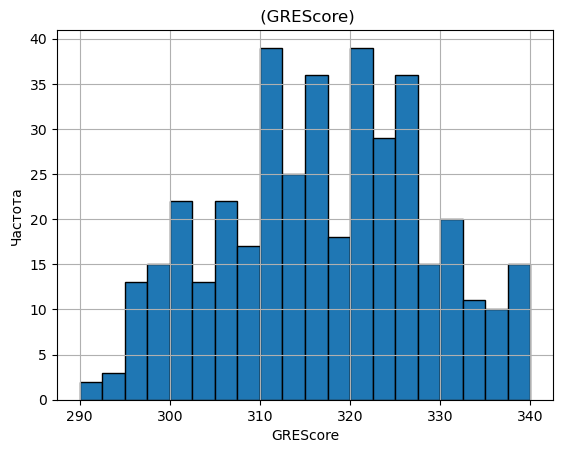

In [11]:
data["GREScore"].hist(bins=20, edgecolor='black')
plt.title(' (GREScore)')
plt.xlabel('GREScore')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

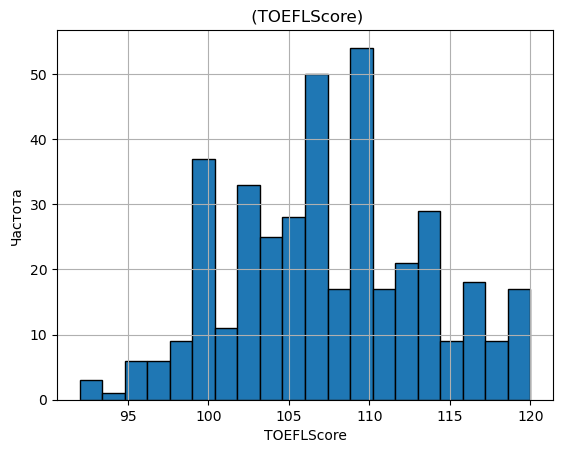

In [12]:
data["TOEFLScore"].hist(bins=20, edgecolor='black')
plt.title(' (TOEFLScore)')
plt.xlabel('TOEFLScore')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

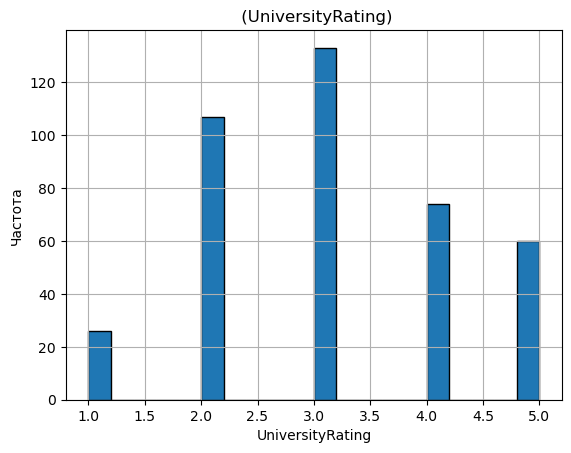

In [13]:
data["UniversityRating"].hist(bins=20, edgecolor='black')
plt.title(' (UniversityRating)')
plt.xlabel('UniversityRating')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

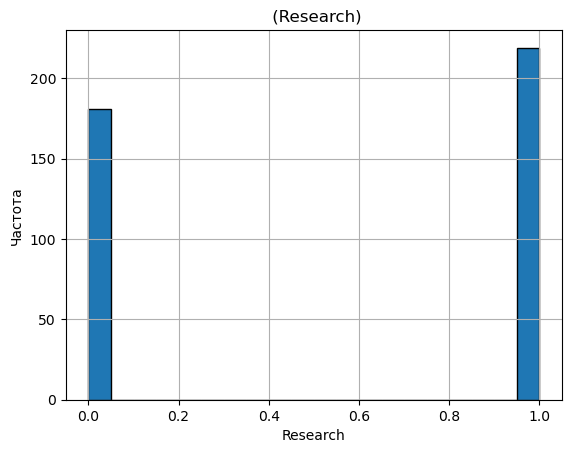

In [14]:
data["Research"].hist(bins=20, edgecolor='black')
plt.title(' (Research)')
plt.xlabel('Research')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

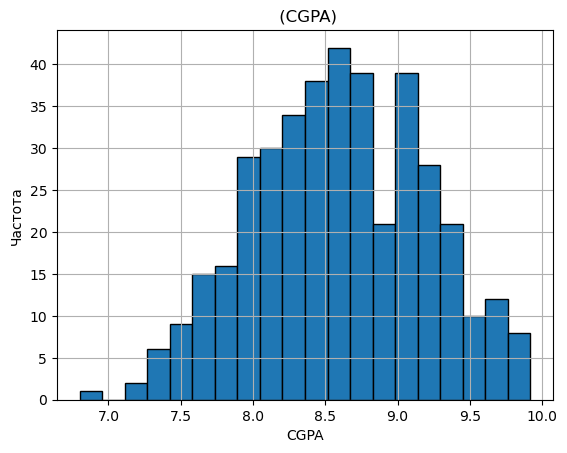

In [15]:
data["CGPA"].hist(bins=20, edgecolor='black')
plt.title(' (CGPA)')
plt.xlabel('CGPA')
plt.ylabel('Частота')

## 7
Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)

Text(0, 0.5, 'Chance of Admit')

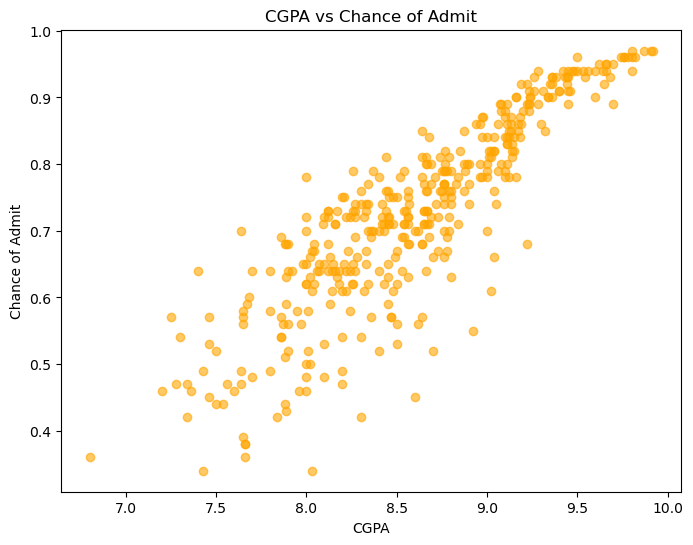

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(data['CGPA'], data['ChanceofAdmit'], alpha=0.6, color='orange')
plt.title('CGPA vs Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')


Text(0, 0.5, 'Chance of Admit')

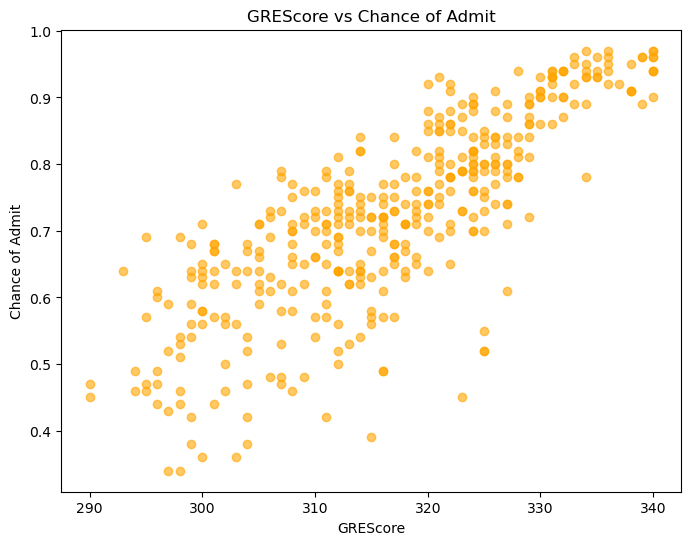

In [17]:

plt.figure(figsize=(8, 6))
plt.scatter(data['GREScore'], data['ChanceofAdmit'], alpha=0.6, color='orange')
plt.title('GREScore vs Chance of Admit')
plt.xlabel('GREScore')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'Chance of Admit')

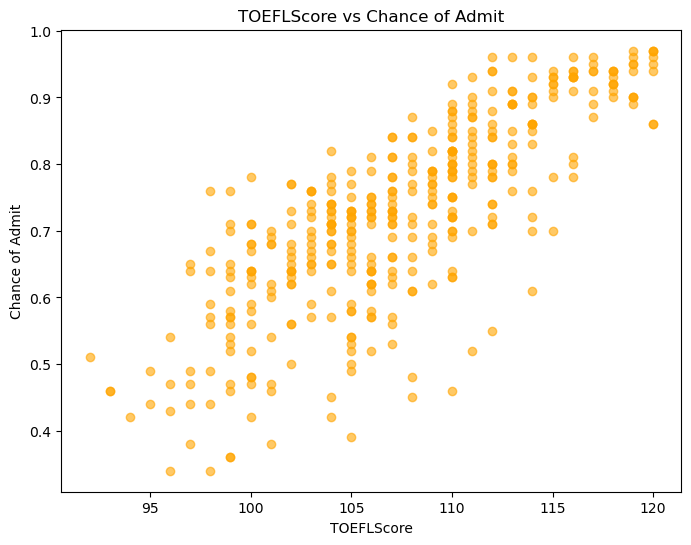

In [18]:

plt.figure(figsize=(8, 6))
plt.scatter(data['TOEFLScore'], data['ChanceofAdmit'], alpha=0.6, color='orange')
plt.title('TOEFLScore vs Chance of Admit')
plt.xlabel('TOEFLScore')
plt.ylabel('Chance of Admit')

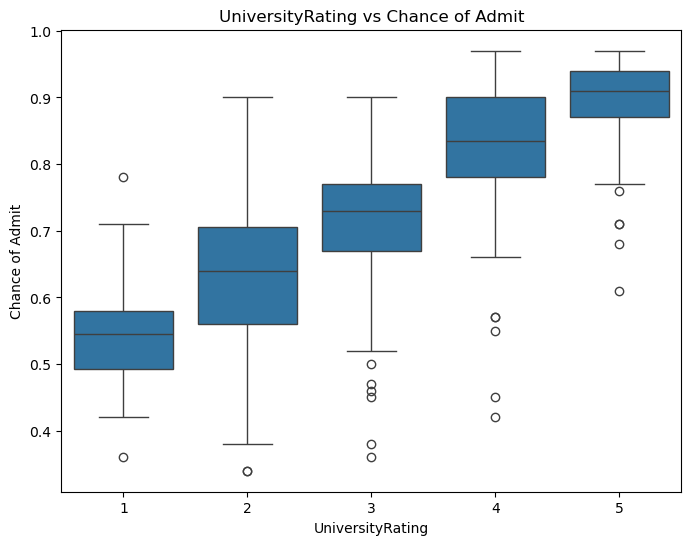

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='UniversityRating', y='ChanceofAdmit', data=data)
plt.title('UniversityRating vs Chance of Admit')
plt.xlabel('UniversityRating')
plt.ylabel('Chance of Admit')
plt.show()


Text(0, 0.5, 'Chance of Admit')

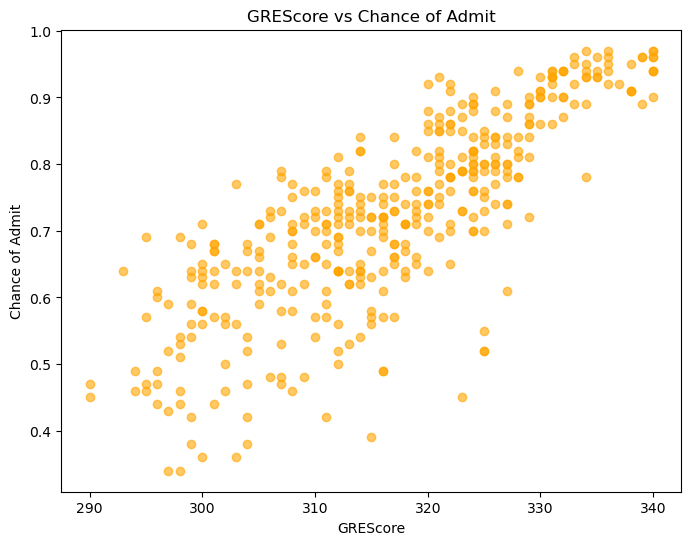

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(data['GREScore'], data['ChanceofAdmit'], alpha=0.6, color='orange')
plt.title('GREScore vs Chance of Admit')
plt.xlabel('GREScore')
plt.ylabel('Chance of Admit')

Text(0, 0.5, 'CGPA')

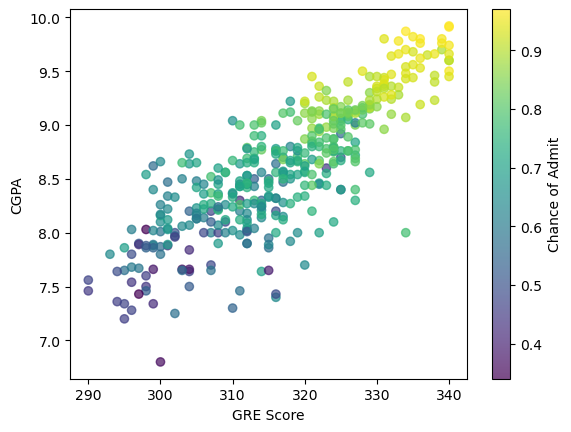

In [ ]:
hren = plt.scatter(data['GREScore'], data['CGPA'], c=data['ChanceofAdmit'], cmap='viridis', alpha=0.7)
plt.colorbar(hren, label='Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')